<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0308_Statistic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def avg(x):
  y = 0
  cnt = 0
  for i in x:
    y += i
    cnt+=1
  return y/cnt

In [4]:
x = [1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

In [14]:
### 모분산 만들기
### 각 데이터를 평균에서 빼고 제곱한뒤에, 모두 더하고 그걸 데이터의 갯수로 나눔

def pvariance(x):
  mean = avg(x)
  var_sum = 0
  for i in x:
    var_sum += (i - mean) ** 2
  return var_sum / len(x)


In [12]:
### 표본분산 만들기
### 각 데이터를 평균에서 빼고 제곱한뒤에, 모두 더하고 그걸 데이터의 갯수 -1 로 나눔

def svariance(x):
  mean = avg(x)
  var_sum = 0
  for i in x:
    var_sum += (i - mean) ** 2
  return var_sum / (len(x) - 1)


In [15]:
pvariance(x)

8.36

In [13]:
svariance(x)

9.288888888888888

In [16]:
import numpy as np

print(np.var(x, ddof=0)) # 넘파이는 모분산이 기본값
print(np.var(x, ddof=1)) # 넘파이는 표본분산으로 바꾸려면 ddof를 1로 바꾸면 됨
# 판다스는 표본분산이 기본값

8.36
9.288888888888888


In [18]:
import math

In [19]:
def pstd(x):
  mean = avg(x)
  var_sum = 0
  for i in x:
    var_sum += (i - mean) ** 2
  return math.sqrt(var_sum / len(x))

In [20]:
def sstd(x):
  mean = avg(x)
  var_sum = 0
  for i in x:
    var_sum += (i - mean) ** 2
  return math.sqrt(var_sum / (len(x) - 1))

In [22]:
print(pstd(x)) #모분산의 표준편차
print(sstd(x)) #표본분산의 표준편차

2.891366458960192
3.0477678535099892


In [17]:
print(np.std(x)) # 모분산의 표준편차
print(np.std(x, ddof=1)) # 표본분산의 표준편차

2.891366458960192
3.0477678535099892


In [23]:
import seaborn as sns

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
# 데이터의 범위
fare_min = df['fare'].min()
fare_max = df['fare'].max()
print(fare_min, fare_max)

0.0 512.3292


In [25]:
len(df['fare'])*0.25

222.75

In [31]:
q1 = sorted(df['fare'])[222]

In [29]:
len(df['fare'])*0.75

668.25

In [32]:
q3 = sorted(df['fare'])[668]

In [33]:
iqr = q3 - q1

In [35]:
iqr

23.1042

In [34]:
minimum = q1 - (1.5*iqr)
minimum

-26.7605

In [36]:
maximum = q3 + (1.5*iqr)
maximum

65.6563

In [45]:
outlier_min = df[df['fare'] < minimum]
outlier_max = df[df['fare'] > maximum]

In [46]:
outlier_min

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [47]:
outlier_max

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


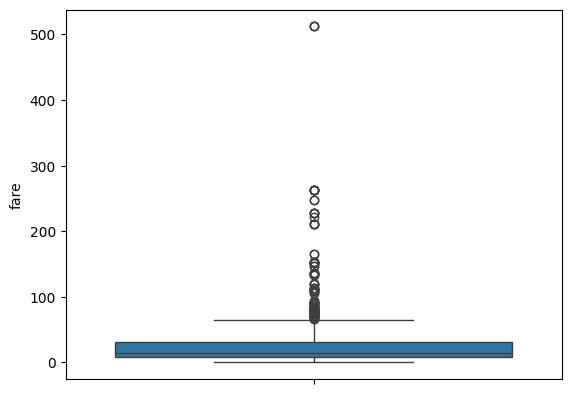

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['fare'])
plt.show()

In [24]:
import random

# 맞춘 횟수
stay = 0
change = 0

# 반복 횟수
cycle = 100000

# 반복문으로 만들기
for i in range(cycle):
  door = [0, 0, 0, 1] # 1은 당첨, 0은 꽝
  random.shuffle(door) # 반복문이 실행될 때마다 랜덤하게 위치 변경

  select = random.randint(0, 3) # 3개 중에 하나를 선택(처음 선택한 문의 번호)
  first_choice = door[select] # door의 값 중 하나 선택

  del(door[select]) # 선택한 값 하나 삭제

  # 꽝을 보여주는 코드
  if door[0] ==  1:
    del(door[1])
  elif door[1] == 1:
    del(door[0])
  else:
    random.shuffle(door)
    del(door[0])

  stay += first_choice # 선택을 바꾸지 않는다 => 첫번째 선택 유지
  change += door[0] # 선택을 바꾼다 => 남은 door 두 개 중에 하나 선택

print('선택을 바꾸지 않은 경우 :', stay)
print('선택을 바꾼 경우 :', change)

선택을 바꾸지 않은 경우 : 25032
선택을 바꾼 경우 : 58449
